<a href="https://colab.research.google.com/github/oucemabennasr/Data_science_workshop/blob/main/Soltion_Third_Order_Polynomial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

boston = datasets.load_boston()

df = pd.DataFrame(data=boston['data'],
                  columns=boston['feature_names'])

df['MEDV'] = boston['target']

In [25]:
y = df['MEDV'].values
x = df['LSTAT'].values.reshape(-1,1)

In [26]:
x[:2]

array([[4.98],
       [9.14]])

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

In [28]:
#PolynomialFeatures(degree=3, include_bias=True,
#                  interaction_only=False,
#                  order='C')

In [29]:
x_poly = poly.fit_transform(x)

In [30]:
x_poly[:2]

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944]])

In [31]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=False)
clf.fit(x_poly, y)

LinearRegression(fit_intercept=False)

In [32]:
x_0, x_1, x_2, x_3 = clf.coef_
msg = ('model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'.format(x_0, x_1, x_2, x_3))
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [33]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred

In [34]:
resid_MEDV[:10]

array([-8.84025736, -2.61360313, -0.65577837, -5.11949581,  4.23191217,
       -3.56387056,  3.16728909, 12.00336372,  4.03348935,  2.87915437])

In [35]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, y_pred)

In [18]:
print('mse = {:.2f}'.format(error))

mse = 28.88


In [36]:
# Setting plot appearance
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

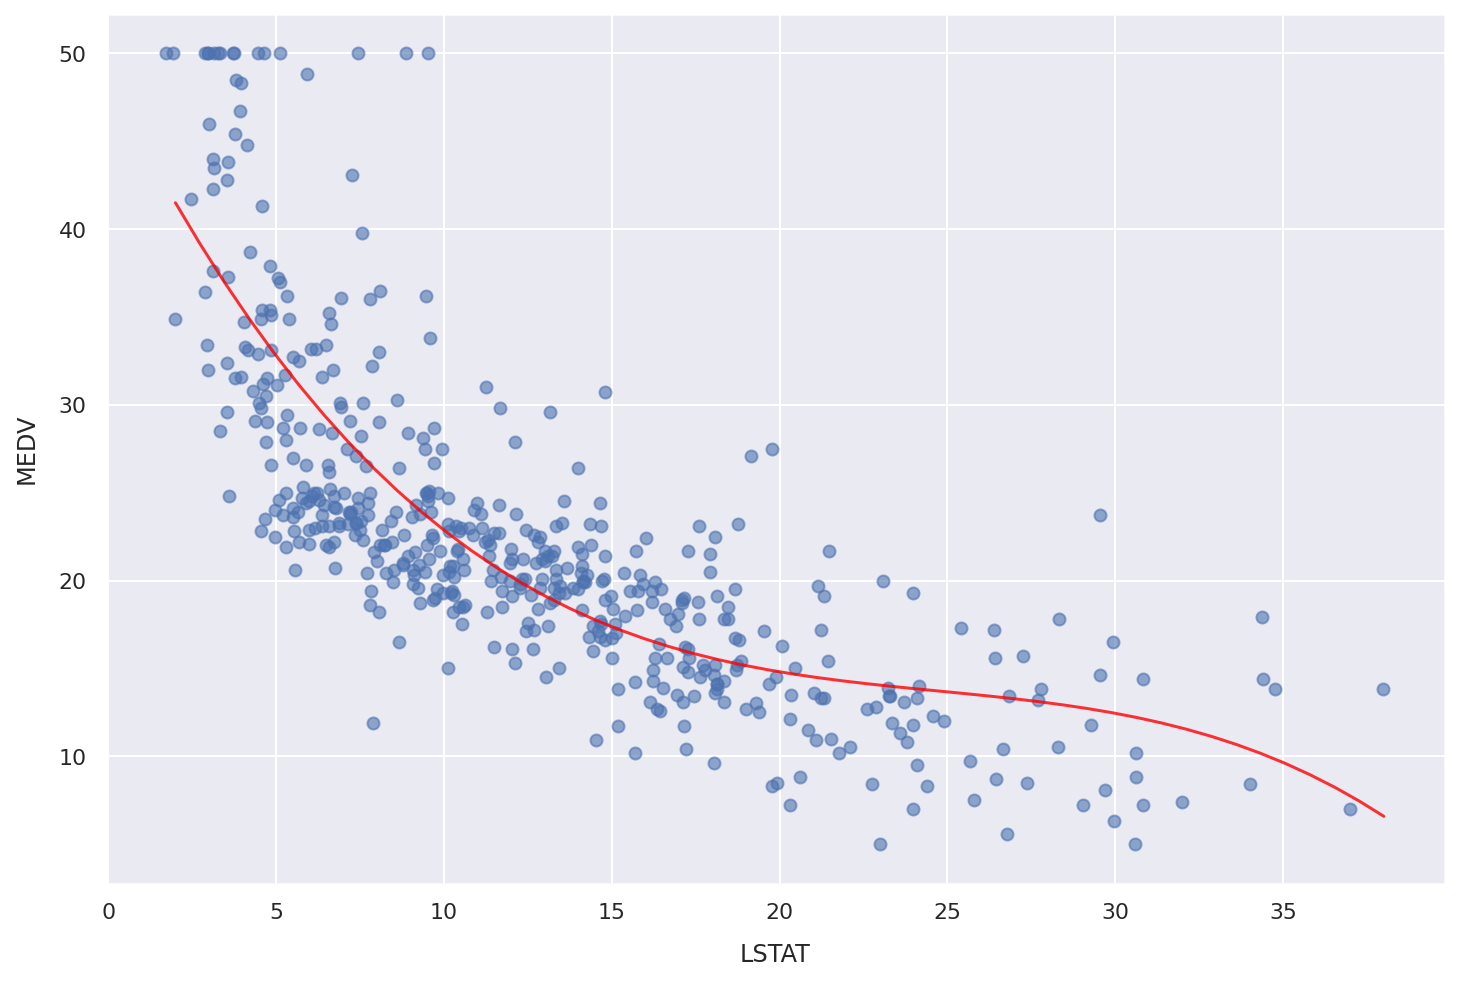

In [37]:
fig, ax = plt.subplots()
# Plot the samples
ax.scatter(x.flatten(), y, alpha=0.6)
# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color='red', alpha=0.8)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
plt.savefig('boston-housing-poly.png', bbox_inches='tight', dpi=300,)

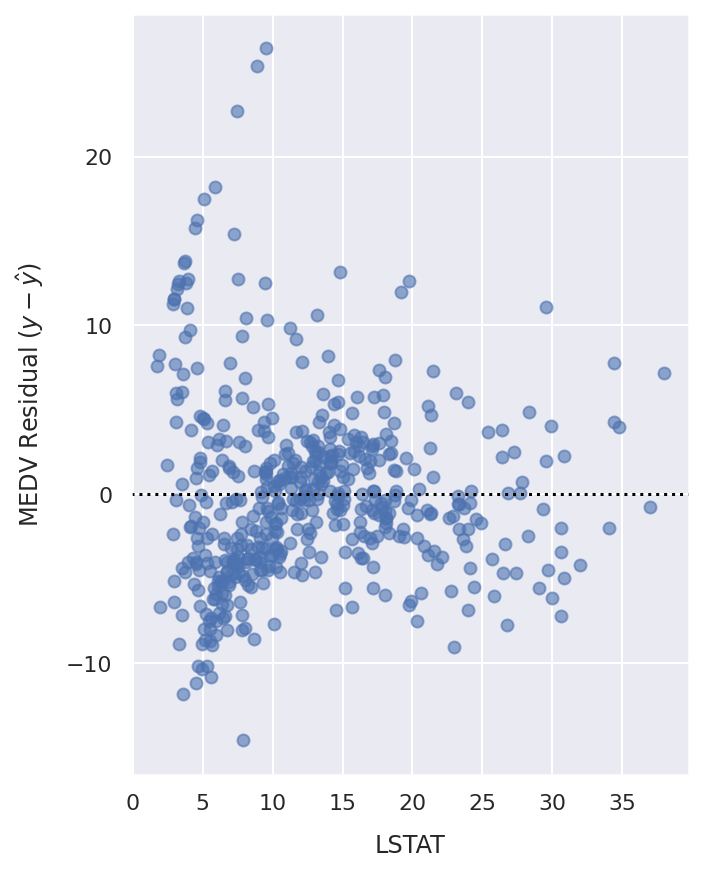

In [38]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x, resid_MEDV, alpha=0.6)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV Residual $(y-\hat{y})$')
plt.axhline(0, color='black', ls='dotted')
plt.savefig('boston-housing-poly-residuals.png', bbox_inches='tight', dpi=300,)